In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv('./input/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df1 = df.copy()

In [4]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} null_rate: {round(null_rate, 2)}%')

director null_rate: 30.68%
cast null_rate: 9.22%
country null_rate: 6.51%
date_added null_rate: 0.13%
rating null_rate: 0.09%


In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [6]:
df['season_count'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' in x['duration'] else '', axis=1)
df['duration'] = df.apply(lambda x: x['duration'].split(' ')[0] if 'Season' not in x['duration'] else '', axis=1)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,season_count
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016.0,12.0,
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018.0,12.0,
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017.0,11.0,
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020.0,1.0,


In [7]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No data', inplace=True)
df['director'].replace(np.nan, 'No data', inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [8]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print(f'{i} null_rate: {round(null_rate,2)}%')
        
print('Wow!, nothing. Wonderfull!')

Wow!, nothing. Wonderfull!


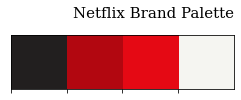

In [9]:
sns.palplot(['#221f1f', '#b20710', '#e50914', '#f5f5f1'])
plt.title('Netflix Brand Palette', loc='right', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

In [10]:
col = 'type'
grouped = df[col].value_counts().reset_index()
grouped = grouped.rename(columns= {col: 'count', 'index':col})

In [11]:
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#b20710", "#f5f780"]))
layout = go.Layout(title='', height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [12]:
d1 = df[df['type'] == 'TV Show']
d2 = df[df['type'] == 'Movie']

col = 'year_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns={col: 'count', 'index': col})
vc1['percent'] = vc1['count'].apply(lambda x: 100*x / sum(vc1['count']))
vc1 = vc1.sort_values(col)

In [13]:
vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns={col: 'count', 'index': col})
vc2['percent'] = vc2['count'].apply(lambda x: 100*x / sum(vc2['count']))
vc2 = vc2.sort_values(col)

In [14]:
trace1 = go.Scatter(x=vc1[col], y=vc1['count'], name='TV Shows', marker=dict(color='#e50914'))
trace2 = go.Scatter(x=vc2[col], y=vc2['count'], name='Movies', marker=dict(color='#b20710'))

In [15]:
data = [trace1, trace2]
layout = go.Layout(title='Over years content', legend=dict(x=0.1, y=1.1, orientation='h'))
fig = go.Figure(data, layout=layout)
fig.show()

In [16]:
col = "release_year"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [17]:
col = 'month_added'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#e50914"))
data = [trace1]
layout = go.Layout(title="In which month, the conent is added the most?", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [18]:
small = df.sort_values("release_year", ascending = True)
small = small[small['duration'] != ""]
small[['title', "release_year"]][:15]

,title,release_year
6117,The Battle of Midway,1942
4960,Prelude to War,1942
7679,WWII: Report from the Aleutians,1943
7616,Why We Fight: The Battle of Russia,1943
7342,Undercover: How to Operate Behind Enemy Lines,1943
6657,The Memphis Belle: A Story of a\nFlying Fortress,1944
6699,The Negro Soldier,1944
7268,Tunisian Victory,1944
5371,San Pietro,1945
4436,Nazi Concentration Camps,1945


In [19]:
df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        United States
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7770, dtype: object

In [20]:
df['first_country'] = df['country'].apply(lambda x: x.split(',')[0])
df['first_country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784     United States
7785         Australia
7786    United Kingdom
Name: first_country, Length: 7770, dtype: object

In [21]:
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK', inplace=True)
df['first_country'].replace('South Korea', 'SK', inplace=True)

In [22]:
df['count'] = 1
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

In [23]:
data

first_country
USA       3379
India      956
UK         576
Canada     259
Japan      235
France     196
SK         194
Spain      168
Mexico     123
Turkey     106
Name: count, dtype: int64

Text(0.125, 0.95, 'The three most frequent countries have been highlighted.')

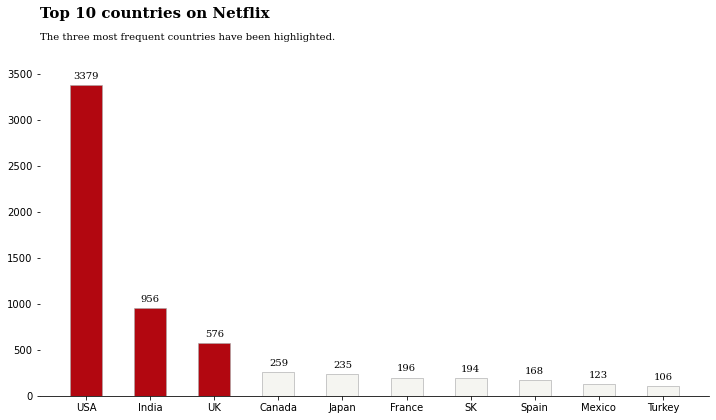

In [24]:
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] = color_map[1]= color_map[2] = '#b20710'
fig,ax = plt.subplots(1,1,figsize=(12,6))
#Annotating the figure
ax.bar(data.index,data,width=0.5,edgecolor='darkgray',linewidth=0.6,color=color_map)
for i in data.index:
    ax.annotate(f"{data[i]}",xy=(i,data[i]+100),va='center',ha='center',fontweight='light',fontfamily='serif')
for s in ['top','left','right']:
    ax.spines[s].set_visible(False)
    
#Adding text
fig.text(0.125,1,'Top 10 countries on Netflix',fontsize=15,fontweight='bold',fontfamily='serif')
fig.text(0.125,0.95,'The three most frequent countries have been highlighted.',fontsize=10,fontweight='light',fontfamily='serif')

In [26]:
import plotly .figure_factory as ff

x1 = d2['duration'].fillna(0.0).astype(float)

fig = ff.create_distplot([x1], ['freq'], bin_size=0.7, curve_type='normal', colors=['#221f1f'])
fig.update_layout(title_text='Distplot')
fig.show()

In [27]:
col = 'season_count'
vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))


trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
data = [trace1]
layout = go.Layout(title="Seasons", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


In [28]:
col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
#vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
#vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#221f1f"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#e50914"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [29]:
import collections
col = "listed_in"
categories = ", ".join(d2['listed_in']).split(", ")
counter_list = collections.Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#221f1f"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

In [30]:
def country_trace(country, flag = "movie"):
    df1["from_us"] = df1['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df1[df1["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = collections.Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="" ,  marker=dict(color= "#221f1f"))
    return trace

In [31]:
from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()

In [32]:
def country_trace(country, flag="tv_shows"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
   
    tags = collections.Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="" ,  marker=dict(color= "#221f1f"))
    return trace

In [33]:
traces = []
titles = ["United States", "","India","", "United Kingdom", "Canada","", "Spain","", "Japan"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)
fig.add_trace(traces[3], 2,1)
fig.add_trace(traces[4], 2,3)
fig.add_trace(traces[5], 2,5)

fig.update_layout(height=1200, showlegend=False)
fig.show()